In [35]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer


df = pd.read_csv("universal_studio_branches.csv")

In [36]:
df.head()

,reviewer,rating,written_date,title,review_text,branch
0,Kelly B,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida
1,Jon,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida
2,Nerdy P,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida
3,ran101278,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida
4,tammies20132015,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida


In [37]:
df[['review_text']]

,review_text
0,We went to Universal over Memorial Day weekend...
1,The food service is horrible. I’m not reviewin...
2,I booked this vacation mainly to ride Hagrid m...
3,When a person tries the test seat for the ride...
4,"Ok, I can't stress enough to anyone and everyo..."
...,...
50899,This is my first visit to a Universal Studio t...
50900,We finally visited Singapore's very first them...
50901,We visited during the first week of its 'soft ...
50902,We visited on the 3rd day of the 'soft' openin...


In [38]:
title = df.title.values
title = pd.DataFrame(title)
title = title.stack().str.replace("'", "").unstack()
title = title.stack().str.lower().unstack()
wc1 = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(title))

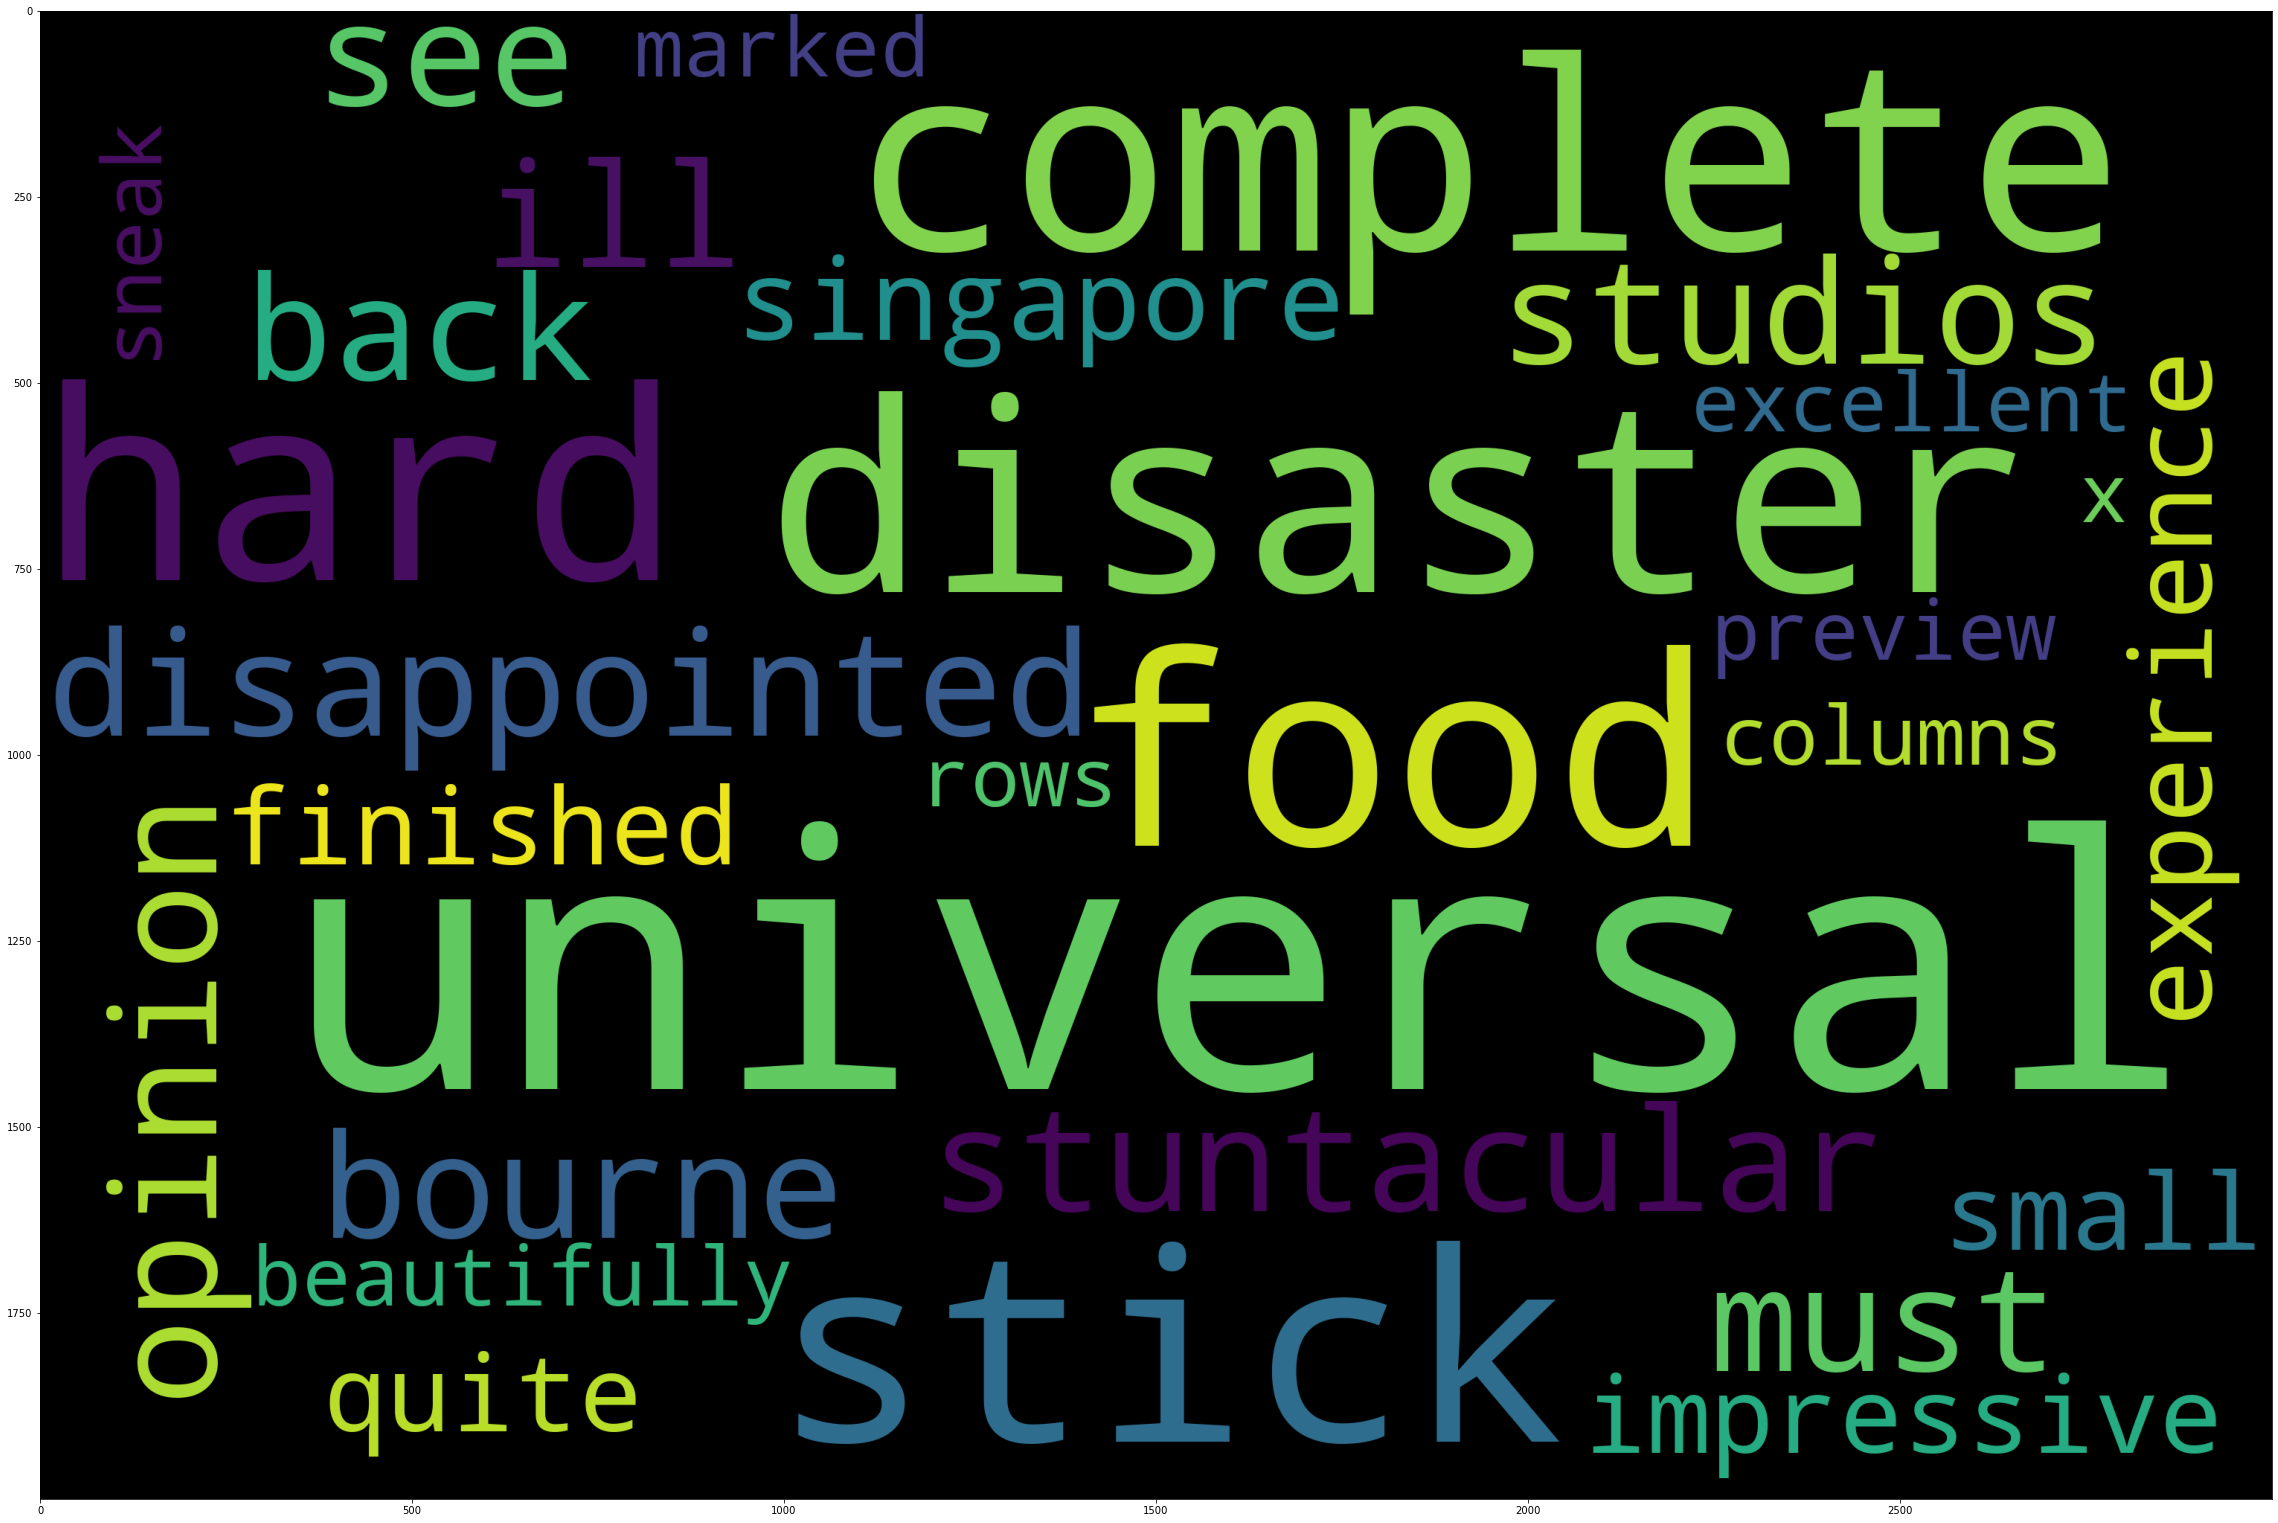

In [39]:
fig = plt.figure(figsize = (40,30))
plt.imshow(wc1)


In [40]:
review = df.review_text.values
review = pd.DataFrame(review)
review = review.stack().str.replace("'", "").unstack()
review = review.stack().str.lower().unstack()
wc2 = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(review))

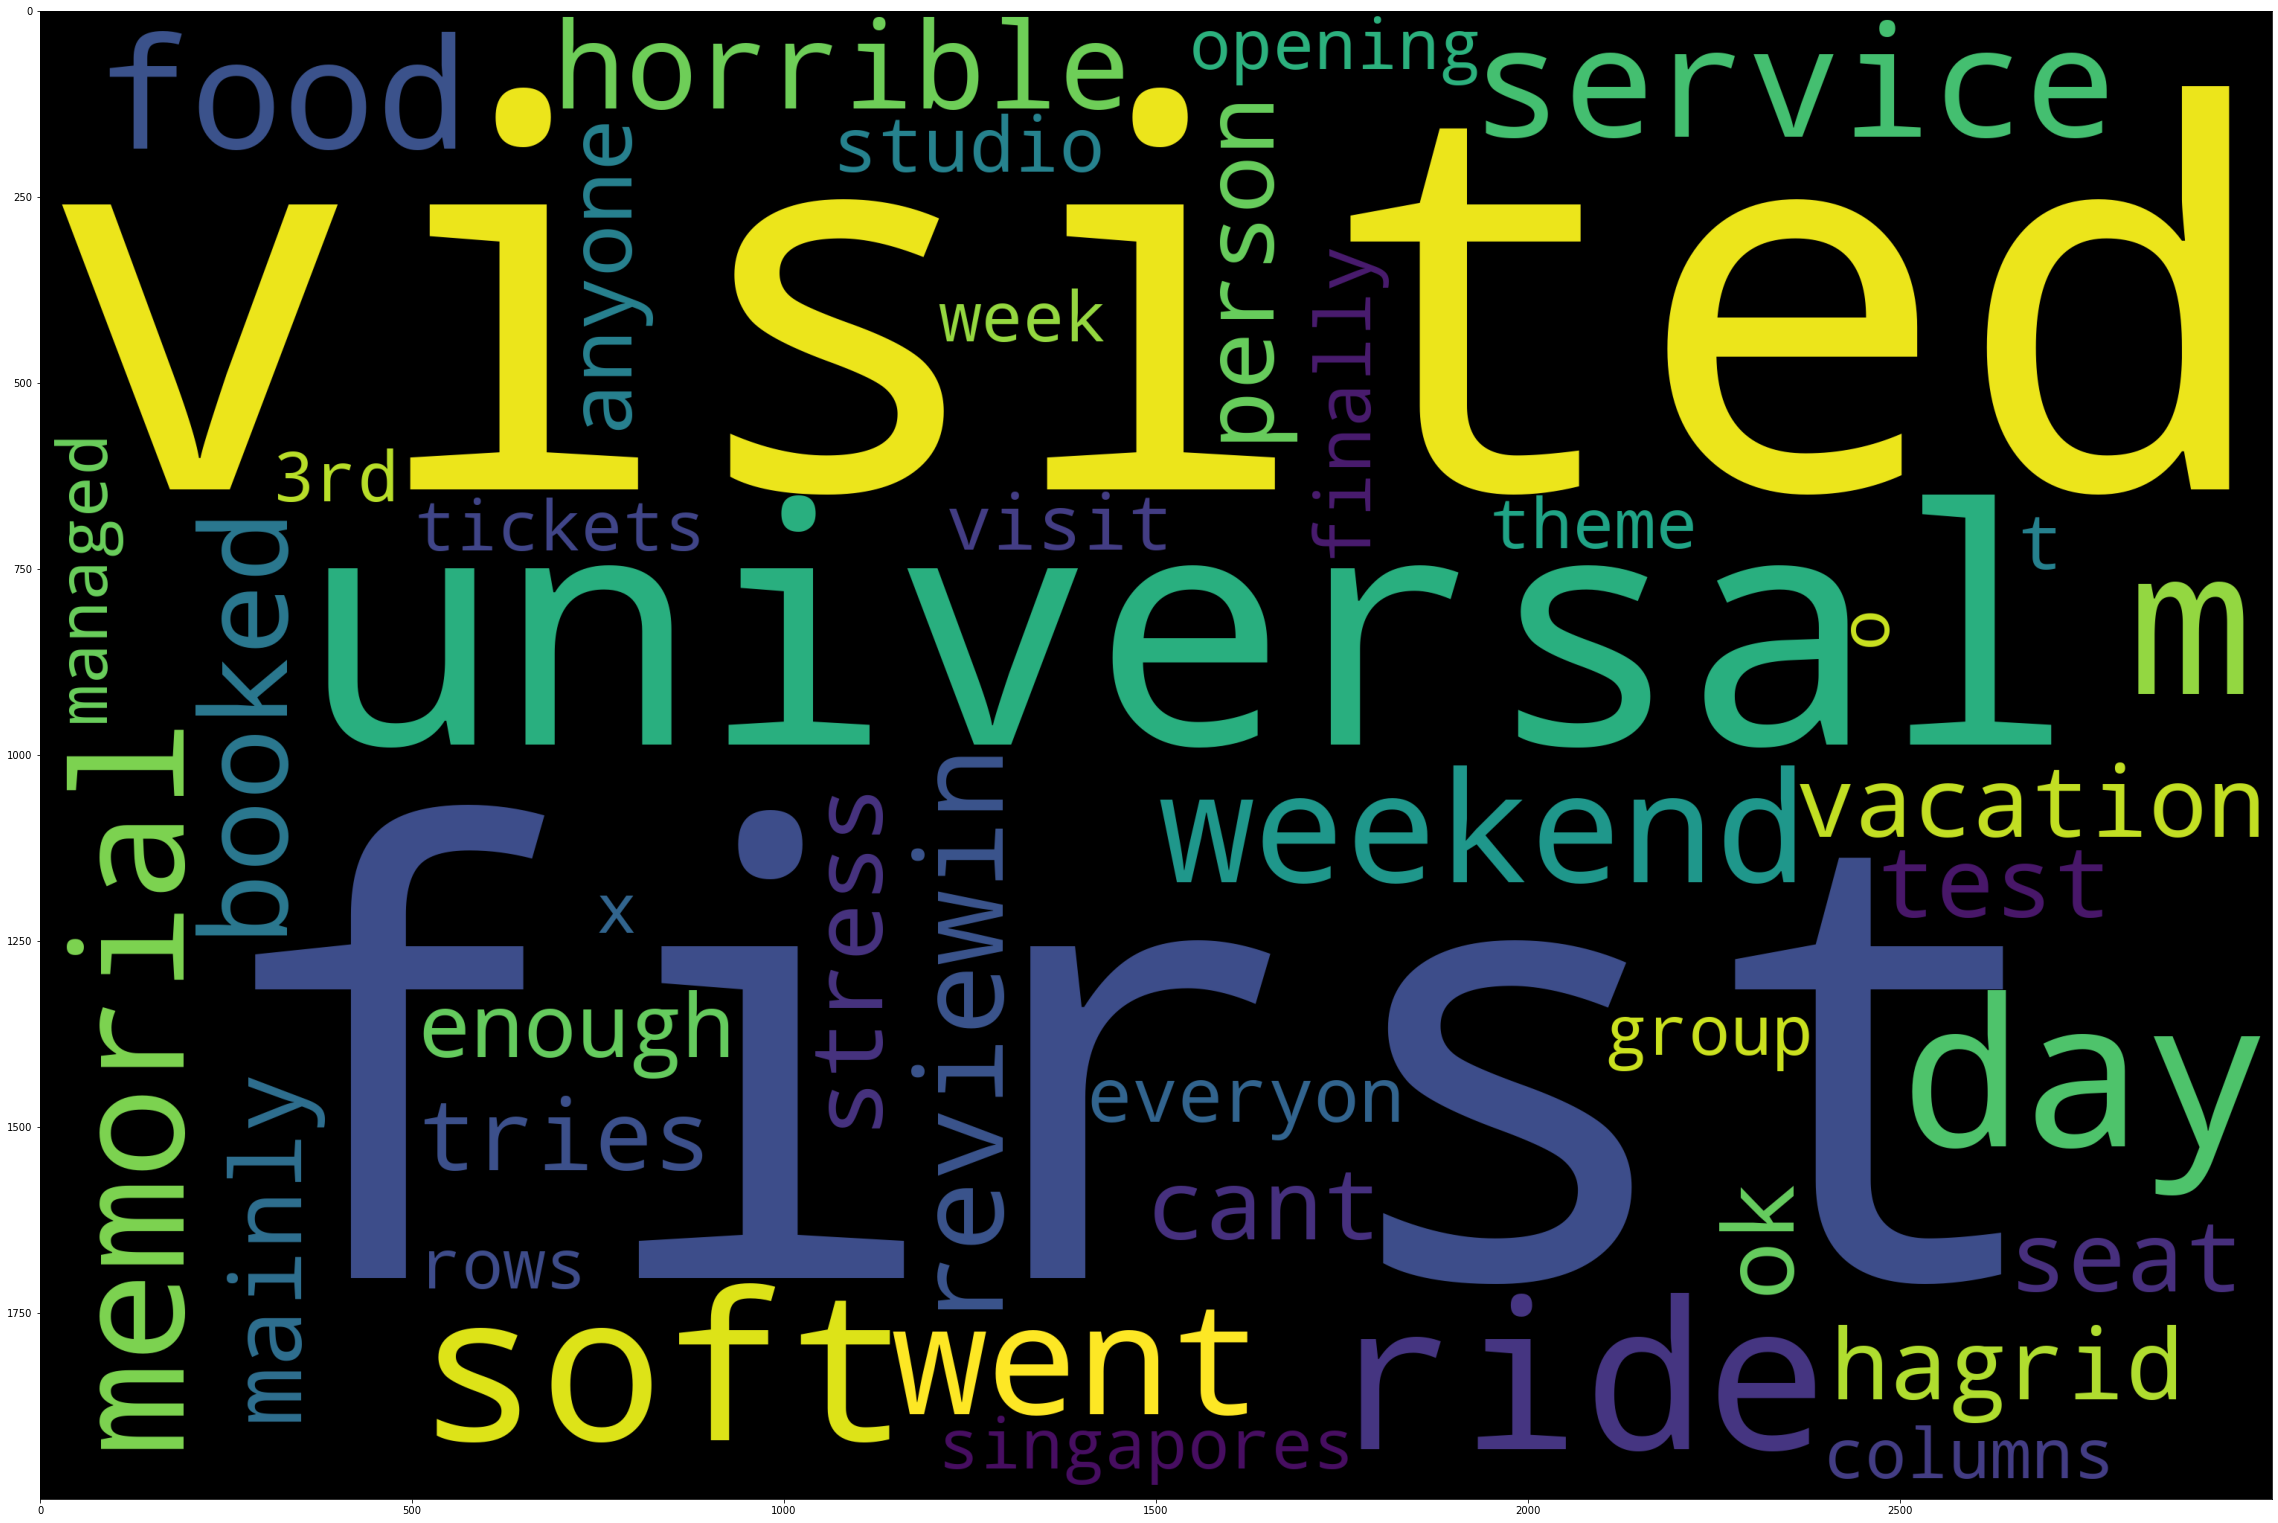

In [41]:
fig = plt.figure(figsize = (40,30))
plt.imshow(wc2)

In [42]:
def tokenization(words):
    w_new= []
    for w in words:
        w_token = word_tokenize(w)
        if w_token != '':
            w_new.append(w_token)
    return w_new

lemmatizer = WordNetLemmatizer()

In [63]:
lemmas = []
tokens = tokenization(df['title'])
for x in tokens:
    for word in x:
        lemmas.append(lemmatizer.lemmatize(word, pos='v'))
        

lemmas = pd.DataFrame(lemmas).stack().str.replace("'","").unstack()
lemmas = lemmas.stack().str.lower().unstack()

In [64]:
wc3 = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(lemmas))

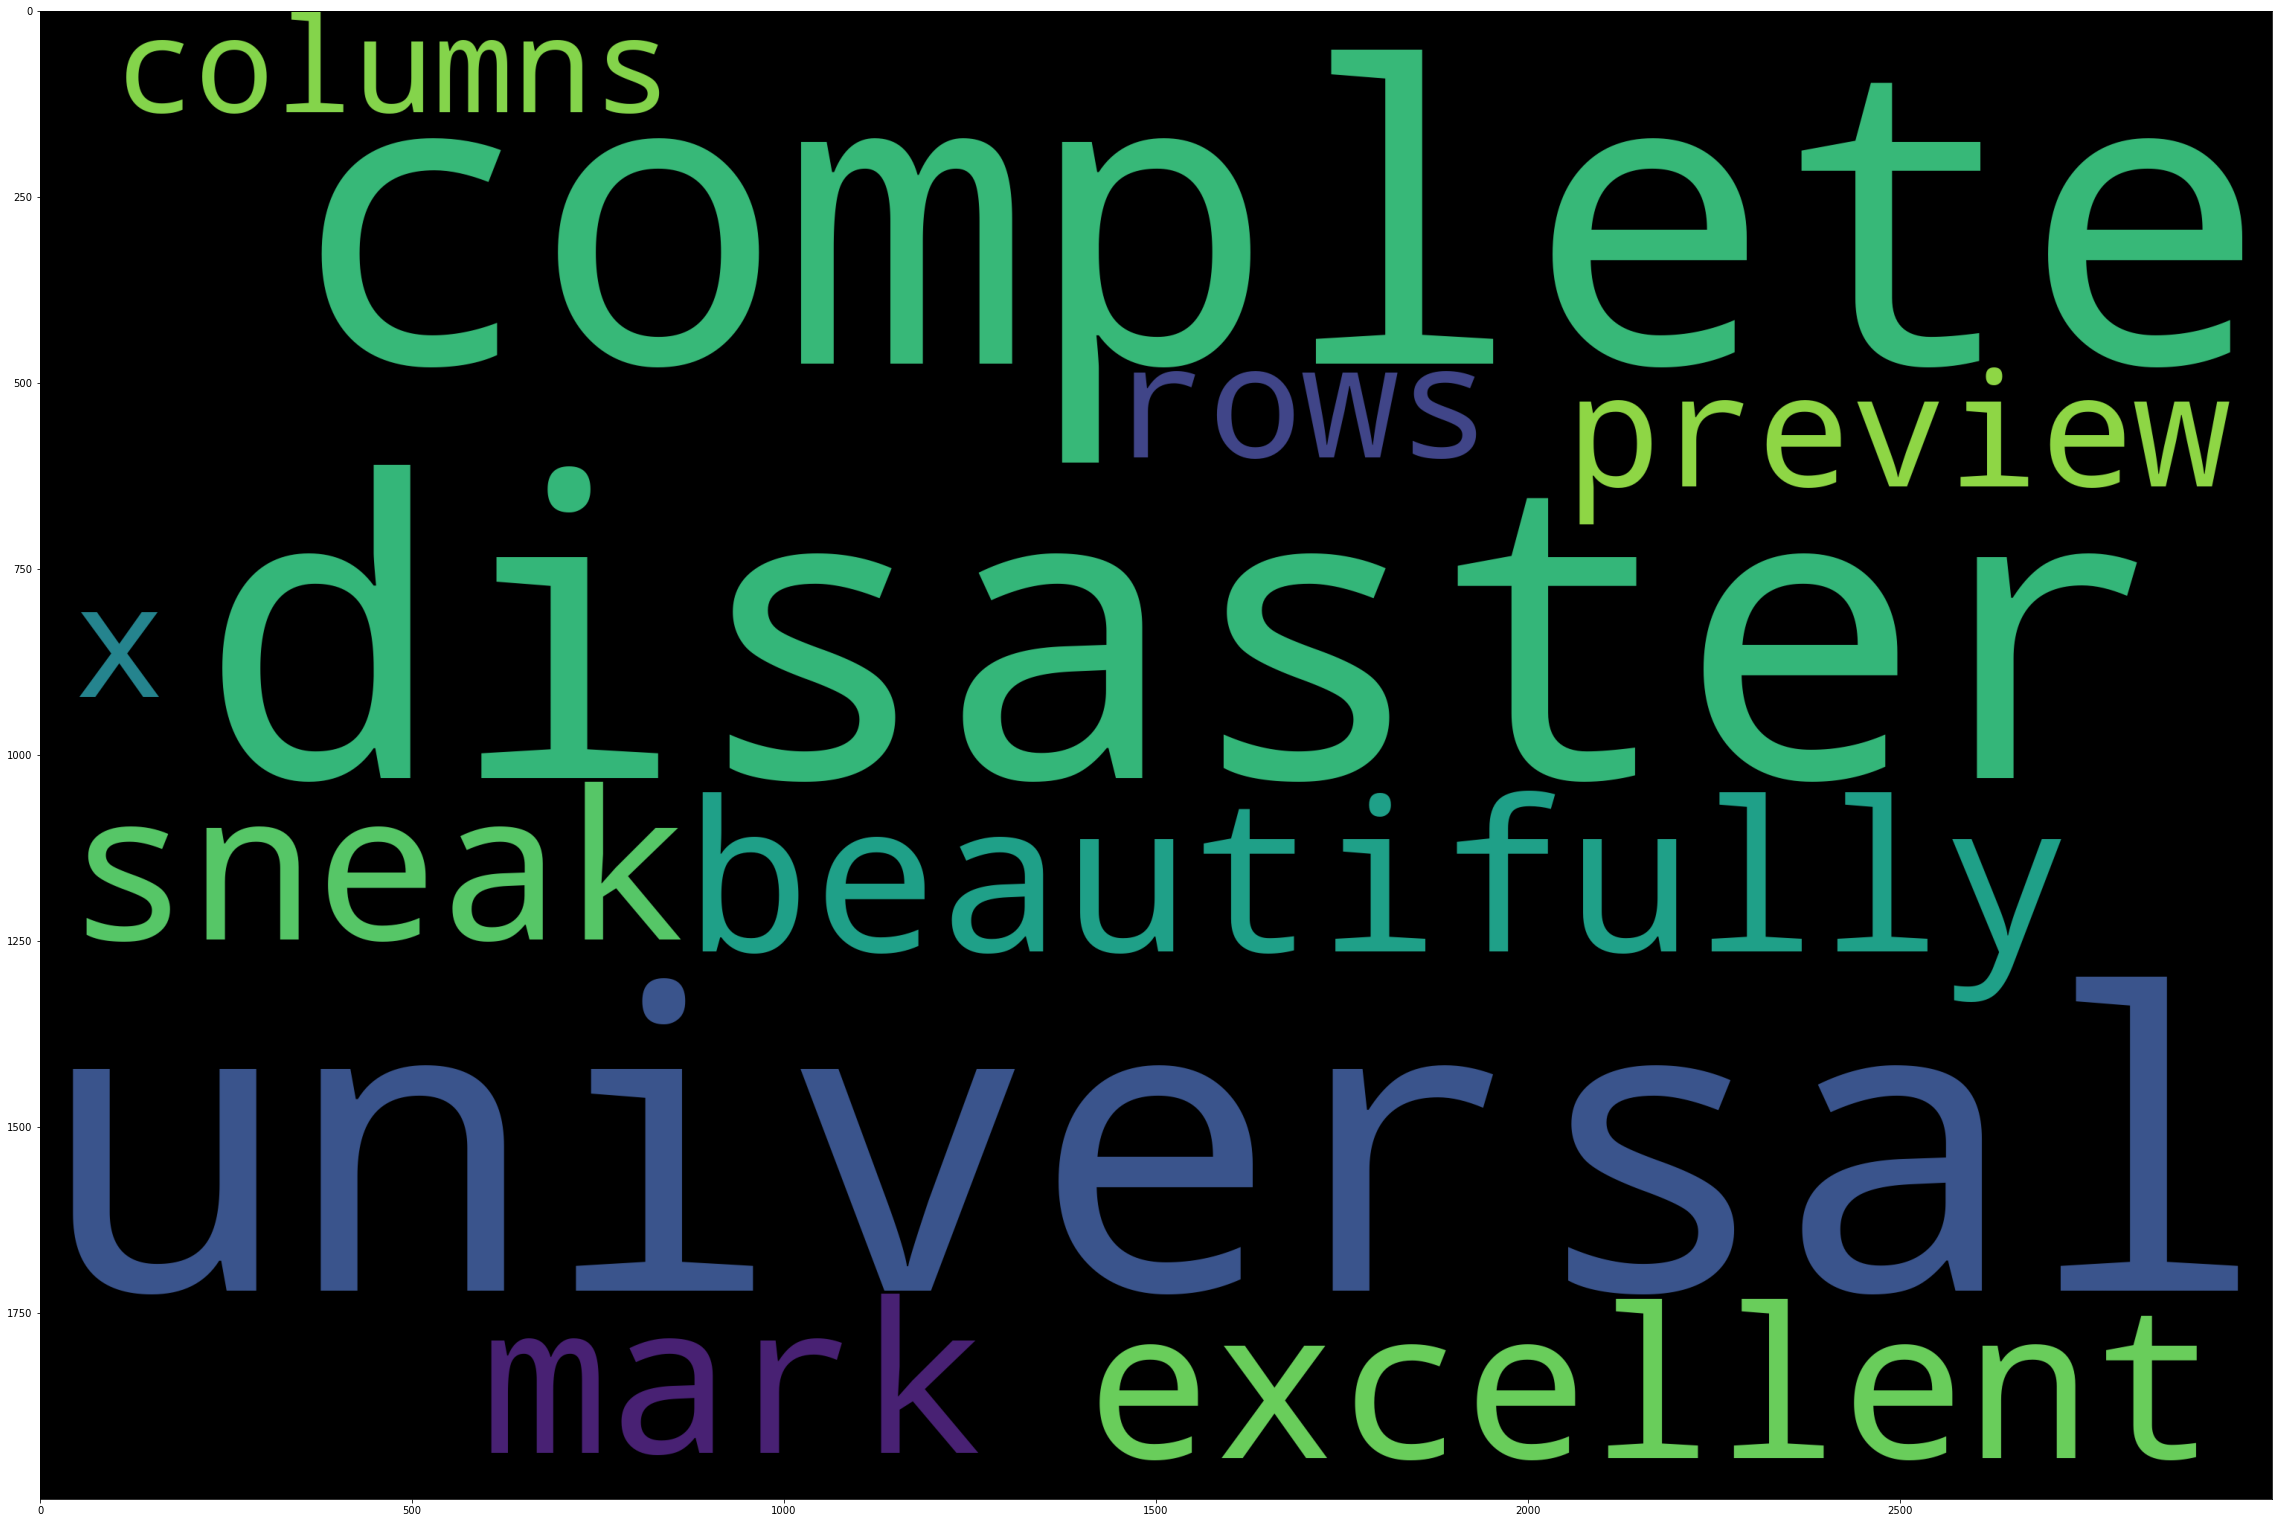

In [65]:
fig = plt.figure(figsize = (40,30))
plt.imshow(wc3)

In [69]:
sia = SentimentIntensityAnalyzer()
for x in df['title']:
    sent = sia.polarity_scores(x)

In [70]:
def is_positive(sent):
    if sia.polarity_scores(sent)["compound"]>0:
        return 'P'
    else:
        return "N"
    
title_pos= []
for x in df['title']:
    title_pos.append(is_positive(x))

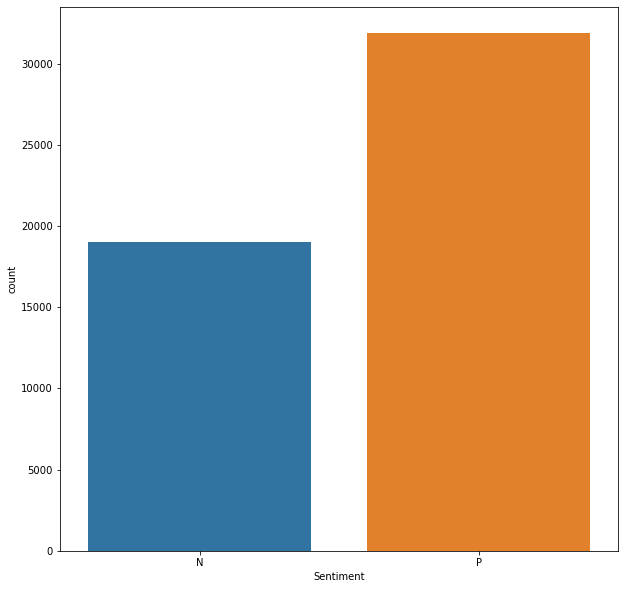

In [71]:
plt.figure(figsize=(10,10))
title_pos = pd.DataFrame(title_pos)
sns.countplot(x=title_pos.columns[0], data=title_pos)
plt.xlabel('Sentiment')
plt.show();